In [15]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [16]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 193
Open profit: 0.20999999999999774
Close profit: -0.5000000000000036
Open ROI: 0.0010880829015543925
Close ROI: -0.002590673575129552
UDI: 0.010866094911225428
AxesSubplot(0.125,0.125;0.775x0.755)


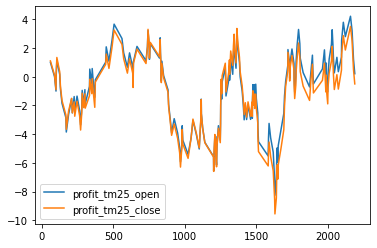

In [17]:
utils.print_total_under_result(segmented_df)

In [18]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
paper_03_H_plus_03_A_loc,0.228993
expected_goal_03_A,0.175589
paper_H_plus_A_loc,0.174106
paper_03_A_loc,0.171661
expected_total_loc,0.171145
paper_03_A,0.160211
paper_03_H_plus_03_A,0.158196
simple_expected_total_value_loc,0.147882
expected_goal_03_A_loc,0.144407
paper_A_loc,0.138778


In [19]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tm25')

,low,high,diff
sum_ufr_classic_loc,6.199200,5.577135,0.622065
sum_ufr_classic,6.401577,5.787685,0.613891
sum_ufr_03_loc,4.925109,4.385841,0.539268
sum_ufr_03,4.825738,4.302176,0.523562
expected_total_loc,2.917757,2.545815,0.371942
expected_total,2.883861,2.542329,0.341531
simple_expected_total_value,5.668081,5.347941,0.320140
paper_H_plus_A_loc,2.812665,2.508905,0.303760
simple_expected_total_value_loc,5.643737,5.349118,0.294620
paper_H_plus_A,2.884930,2.594767,0.290163


In [23]:
updated_segmented_df = segmented_df.loc[
(segmented_df['paper_03_H_plus_03_A_loc'] <= 1.87) & (segmented_df['paper_H_plus_A_loc'] <= 2.50)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'paper_03_H_plus_03_A_loc',
    'paper_H_plus_A_loc',
], 'udi_tm25')

,low,high,diff
paper_03_H_plus_03_A_loc,1.681430,1.607196,0.074234
paper_H_plus_A_loc,2.158616,2.137094,0.021521


Count: 12
Open profit: -1.4600000000000004
Close profit: -1.3699999999999997
Open ROI: -0.1216666666666667
Close ROI: -0.11416666666666664
UDI: 0.044030077284490265
AxesSubplot(0.125,0.125;0.775x0.755)


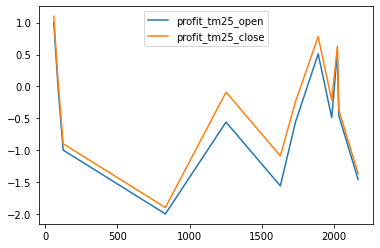

In [25]:
filtered_result_df = segmented_df.loc[
(segmented_df['paper_03_H_plus_03_A_loc'] <= 1.60) & (segmented_df['paper_H_plus_A_loc'] <= 2.13)
]
utils.print_total_under_result(filtered_result_df)